In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
def handlerate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'type of restaurant')

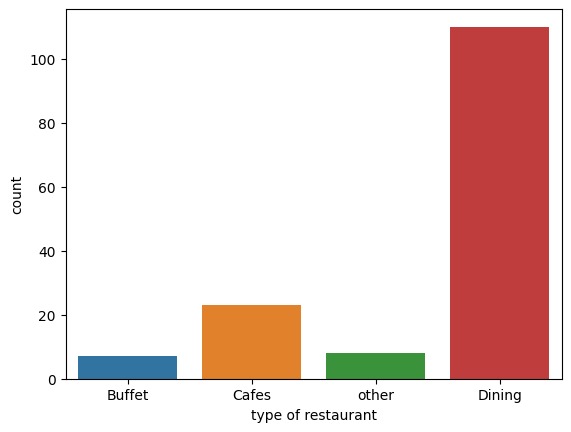

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")

Text(0, 0.5, 'Votes')

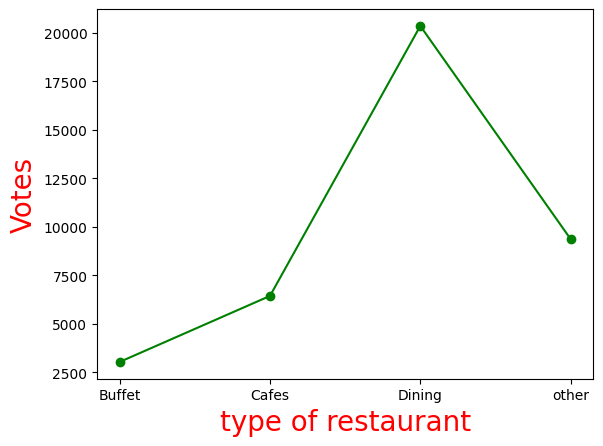

In [12]:
g_df=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':g_df})
plt.plot(result,c="green",marker="o")
plt.xlabel("type of restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

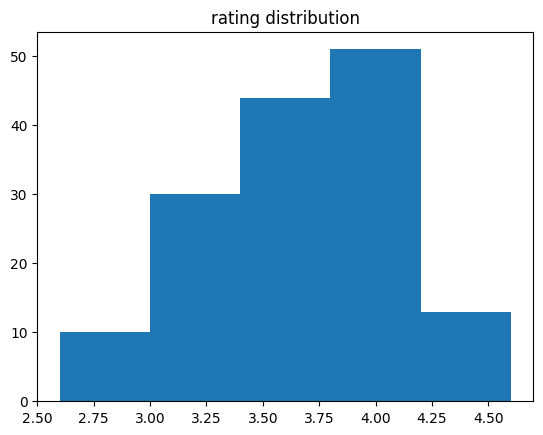

In [14]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()


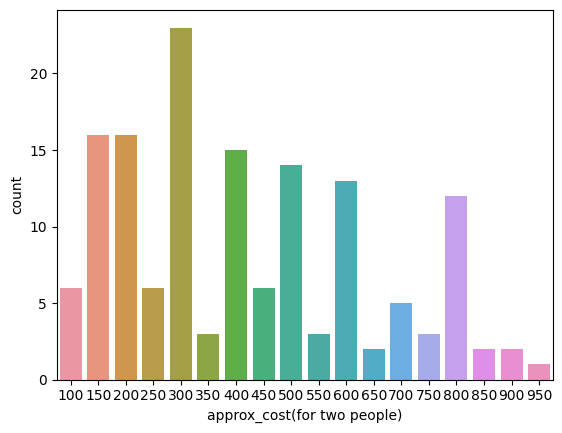

In [15]:
couple_df=df['approx_cost(for two people)']
sns.countplot(x=couple_df)
plt.show()

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


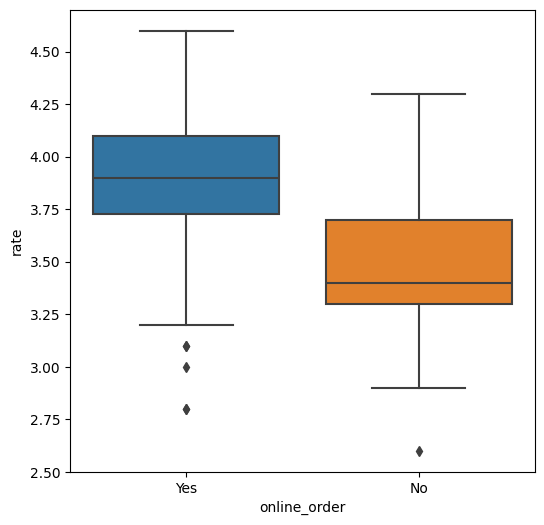

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

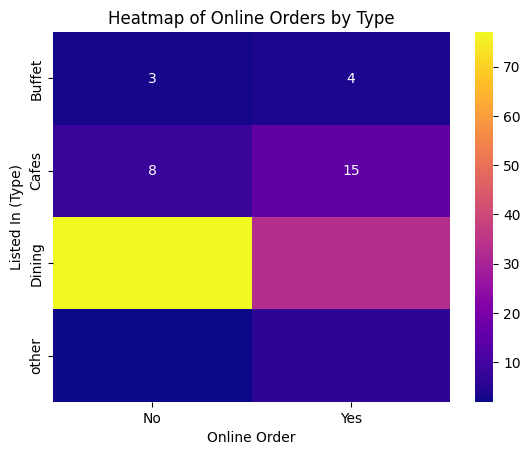

In [32]:
p_df = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Creating a heatmap with the pivot table
sns.heatmap(p_df, annot=True, cmap='plasma', fmt='d')

# Setting the title and labels
plt.title("Heatmap of Online Orders by Type")
plt.xlabel('Online Order')
plt.ylabel("Listed In (Type)")

# Showing the plot
plt.show()

Conclusion:Dining restaurants primarily accept offline orders ,whereas cafes primarily receive online orders.this suggest that clients
prefered orders in person in resaurants,but prefer online ordering at cafes.